# AdaBoost Clustering

AdaBoost funktioniert im Konzept ähnlich wie Random Forest. Es werden viele Bäume erzeugt, die dann in einem Council-Verfahren klassifizieren.

Anders als im Random Forest werden hier allerdings die Bäume sehr klein gehalten. Jedoch werden die Bäume nicht zufällig erzeugt sondern basierend auf der Error Rate des vorherigen. Somit soll eine bessere Coverage erreicht werden und

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [20]:
iris = sns.load_dataset('iris')
print(iris.head())
iris.describe()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


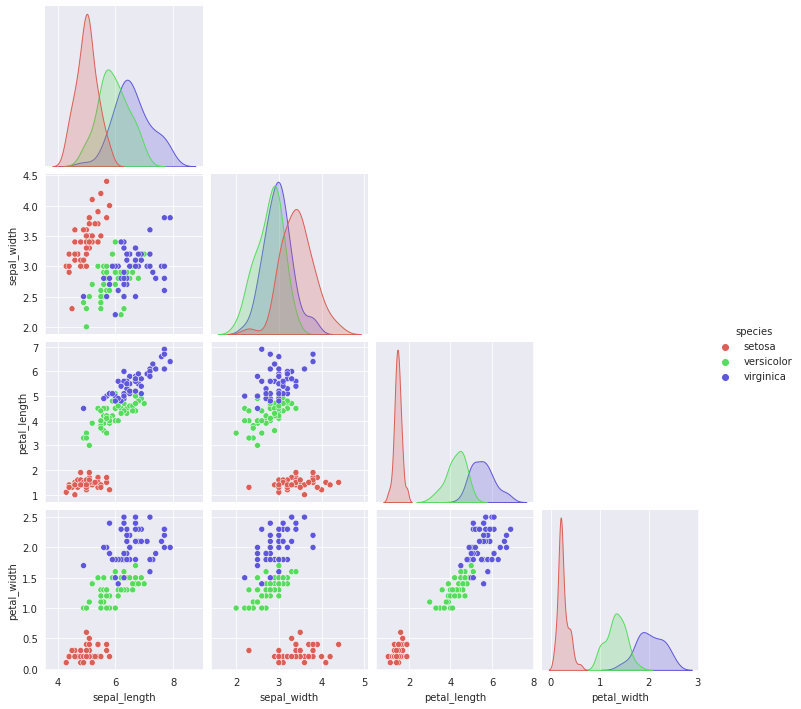

In [21]:
palette = sns.color_palette("hls", 3)
sns.pairplot(iris, hue='species', palette=palette, corner=True)

In [22]:
X = iris.drop('species', axis=1)
enc = LabelEncoder().fit(iris.species)
y = enc.transform(iris.species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

ab = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
ab.score(X_test, y_test)

1.0

In [23]:
for name, importance in zip(ab.feature_names_in_, ab.feature_importances_):
    print("{} importance: {:.2%} ".format(name, importance))

sepal_length importance: 0.00% 
sepal_width importance: 0.00% 
petal_length importance: 48.00% 
petal_width importance: 52.00% 


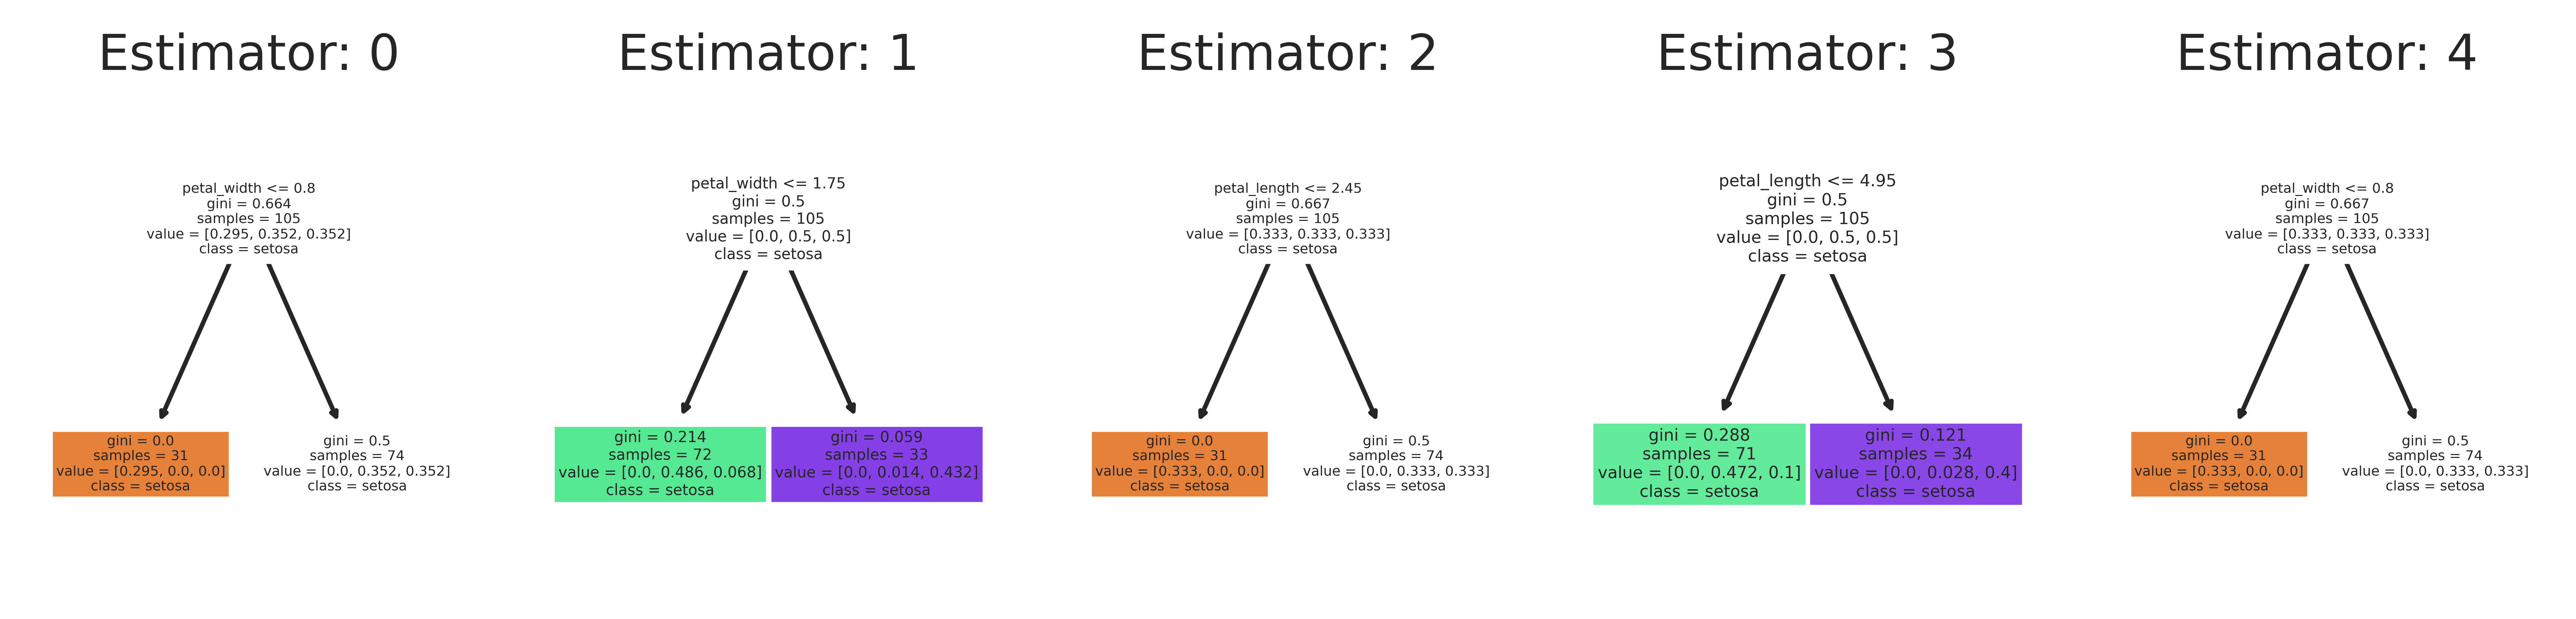

In [24]:
# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(ab.estimators_[index],
                   feature_names = ab.feature_names_in_,
                   class_names=iris.species,
                   filled = True,
                   ax = axes[index])

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('AB_5trees.png')

In [25]:
close_data = pd.DataFrame(data={ 'sepal_length': [4.95], 'sepal_width': [3.0], 'petal_length': [1.4], 'petal_width': [0.2], 'species': ['setosa'] })

In [26]:
X_valid = close_data.drop('species', axis=1)

from scipy.spatial import distance

X_leaves = ab.decision_function(X)[0]
valid_leaves = ab.decision_function(X_valid)[0]
distances = [distance.euclidean(valid_leaves, l) for l in X_leaves]
np.argmin(distances)

1